In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig
!pip install geopandas
import geopandas
import pandas as pd
!pip install contextily
import contextily as ctx

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
areesosta = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_areesosta')
stradario = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/stradario.csv')
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm (1)/NIL_WM.dbf')

In [10]:
stradario.drop(columns='geometry',inplace=True)
stradario

CODICE_VIA AREA DESCRIZIONE_VIA CIVICO BARRATO  CAP SEZIONE MUNICIPIO
0           4377  VIA  8 OTTOBRE 2001     12          138     916         4
1           3123  VIA     A.DEL SARTO      1          129     665         3
2           3123  VIA     A.DEL SARTO      3          129     665         3
3           3123  VIA     A.DEL SARTO      4          129     665         3
4           3123  VIA     A.DEL SARTO      5          129     665         3
...          ...  ...             ...    ...     ...  ...     ...       ...
51318       6318  VIA          ZURIGO     24          147     394         7
51319       6318  VIA          ZURIGO     24       4  147     394         7
51320       6318  VIA          ZURIGO     25          147    1412         6
51321       6318  VIA          ZURIGO     28          147     539         7
51322       6318  VIA          ZURIGO     65          147    1412         6

[51323 rows x 8 columns]

In [11]:
areesosta

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

In [12]:
stradario

CODICE_VIA AREA DESCRIZIONE_VIA CIVICO BARRATO  CAP SEZIONE MUNICIPIO
0           4377  VIA  8 OTTOBRE 2001     12          138     916         4
1           3123  VIA     A.DEL SARTO      1          129     665         3
2           3123  VIA     A.DEL SARTO      3          129     665         3
3           3123  VIA     A.DEL SARTO      4          129     665         3
4           3123  VIA     A.DEL SARTO      5          129     665         3
...          ...  ...             ...    ...     ...  ...     ...       ...
51318       6318  VIA          ZURIGO     24          147     394         7
51319       6318  VIA          ZURIGO     24       4  147     394         7
51320       6318  VIA          ZURIGO     25          147    1412         6
51321       6318  VIA          ZURIGO     28          147     539         7
51322       6318  VIA          ZURIGO     65          147    1412         6

[51323 rows x 8 columns]

In [13]:
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [15]:
areesosta['id_via']= areesosta['id_via'].astype(str)

In [ ]:
stradario['CODICE_VIA']= stradario['CODICE_VIA'].astype(str)
stradario.CODICE_VIA.dtypes


- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [85]:
strada_sosta = pd.merge(areesosta,stradario,how='inner',left_on='id_via',right_on='CODICE_VIA')
strada_sosta[['DESCRIZIONE_VIA','CIVICO','stalli_tot']]

DESCRIZIONE_VIA CIVICO  stalli_tot
0       ABBIATEGRASSO      1          15
1       ABBIATEGRASSO      2          15
2       ABBIATEGRASSO      7          15
3       ABBIATEGRASSO      8          15
4       ABBIATEGRASSO     12          15
...               ...    ...         ...
39919     SAN DIONIGI    117          30
39920     SAN DIONIGI    119          30
39921     SAN DIONIGI    120          30
39922     SAN DIONIGI    121          30
39923     SAN DIONIGI    135          30

[39924 rows x 3 columns]

- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [69]:
df_total = geopandas.sjoin(strada_sosta,quartieri,op = 'within',how='left')
df_total2 = df_total[['DESCRIZIONE_VIA','CIVICO','NIL','stalli_tot']]
df_total2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


DESCRIZIONE_VIA  ... stalli_tot
0       ABBIATEGRASSO  ...         15
1       ABBIATEGRASSO  ...         15
2       ABBIATEGRASSO  ...         15
3       ABBIATEGRASSO  ...         15
4       ABBIATEGRASSO  ...         15
...               ...  ...        ...
39919     SAN DIONIGI  ...         30
39920     SAN DIONIGI  ...         30
39921     SAN DIONIGI  ...         30
39922     SAN DIONIGI  ...         30
39923     SAN DIONIGI  ...         30

[39924 rows x 4 columns]

- i nomi dei quartieri in cui non ci sono aree di sosta;

In [70]:
nososta = quartieri[~quartieri['NIL'].isin(df_total['NIL'])] # ~ serve per invertire i valori
nososta

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

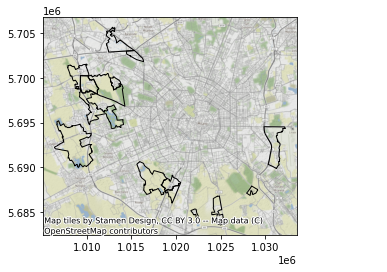

In [71]:
ax = quartieri[~quartieri["NIL"].isin(df_total["NIL"])].to_crs(3857).plot(facecolor='none', edgecolor='k')
ctx.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [72]:
max_sosta = df_total.groupby('NIL',as_index=False)[['stalli_tot']].count()
quartiereMax = max_sosta[max_sosta['stalli_tot'] == max_sosta['stalli_tot'].max()]
quartiereMax 

NIL  stalli_tot
31  LORETO - CASORETTO - NOLO        4090

- una mappa di Milano con l'indicazione 

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


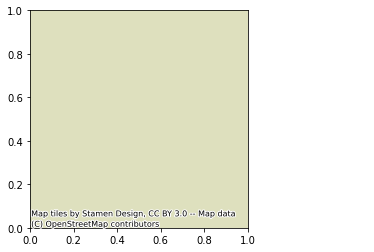

In [73]:
ax = quartieri[quartieri.NIL.isin(quartiereMax.index)].to_crs(3857).plot(alpha=0.5)
ctx.add_basemap(ax)

- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [74]:
Quart_Mean = df_total.groupby('NIL')['stalli_tot'].count().mean()
QuartieriMedia = df_total.groupby('NIL')[['stalli_tot']].count()[df_total.groupby('NIL')['stalli_tot'].count() < Quart_Mean].sort_values(by = 'stalli_tot' )
QuartieriMedia.reset_index()

NIL  stalli_tot
0                                          PARCO NORD           6
1                        MAGGIORE - MUSOCCO - CERTOSA           8
2                                 PARCO DELLE ABBAZIE          12
3                                             TIBALDI          16
4                                      PARCO SEMPIONE          18
5                                            COMASINA          20
6                                             ROSERIO          23
7                                           TRE TORRI          28
8                                   TRIULZO SUPERIORE          29
9               TALIEDO - MORSENCHIO - Q.RE FORLANINI          46
10     RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO          52
11                            ROGOREDO - SANTA GIULIA          54
12                                             FARINI          64
13                                        ORTOMERCATO          69
14                                     QUARTO CAGNINO          71
15                                               QT 8          73
16                                           SAN SIRO          81
17                                           MUGGIANO          99
18                                            ADRIANO          99
19                                      QUINTO ROMANO         100
20                                           BRUZZANO         130
21                                          BOVISASCA         146
22                         PARCO FORLANINI - CAVRIANO         150
23                          MONCUCCO - SAN CRISTOFORO         183
24                                           GHISOLFA         189
25                                 STADIO - IPPODROMI         216
26       GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE         220
27                                             BARONA         236
28                                  LAMBRATE - ORTICA         240
29                  QUARTO OGGIARO - VIALBA - MUSOCCO         243
30                                       SCALO ROMANA         244
31                                          MORIVIONE         248
32                            VIGENTINO - Q.RE FATIMA         249
33                                      PORTA MAGENTA         270
34                       UMBRIA - MOLISE - CALVAIRATE         277
35                   PORTA VIGENTINA - PORTA LODOVICA         284
36                PORTA TICINESE - CONCA DEL NAVIGLIO         287
37                              GIARDINI P.TA VENEZIA         336
38                                           PORTELLO         354
39                                            DERGANO         354
40                                        GIAMBELLINO         357
41                                    GRECO - SEGNANO         365
42                         PORTA TICINESE - CONCHETTA         387
43                                             BOVISA         395
44                                            BICOCCA         401
45                                         XXII MARZO         409
46                                        LORENTEGGIO         428
47                                         BANDE NERE         444
48                            MACIACHINI - MAGGIOLINA         445
49                                             PAGANO         447
50                             DE ANGELI - MONTE ROSA         454
51  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...         469
52                               MAGENTA - S. VITTORE         474
53                                             AFFORI         491

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;


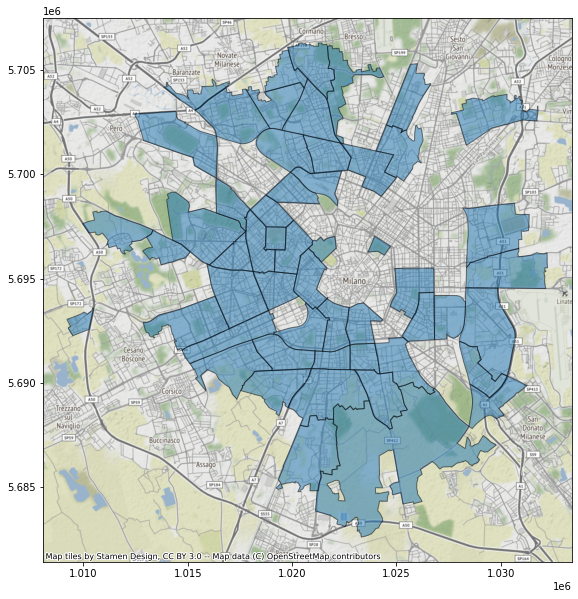

In [75]:
ax = quartieri[quartieri.NIL.isin(QuartieriMedia.index)].to_crs(3857).plot(edgecolor='k', alpha=0.5,figsize =(10,10))
ctx.add_basemap(ax)

- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

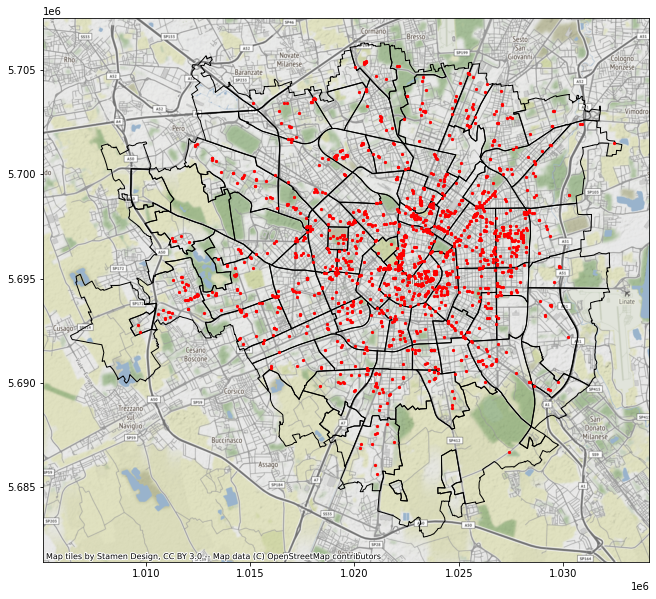

In [76]:
ax = quartieri.to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor = 'none',figsize=(15,10))
areesosta.to_crs(epsg = 3857).plot(ax=ax, color='red',markersize = 5)
ctx.add_basemap(ax)

- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

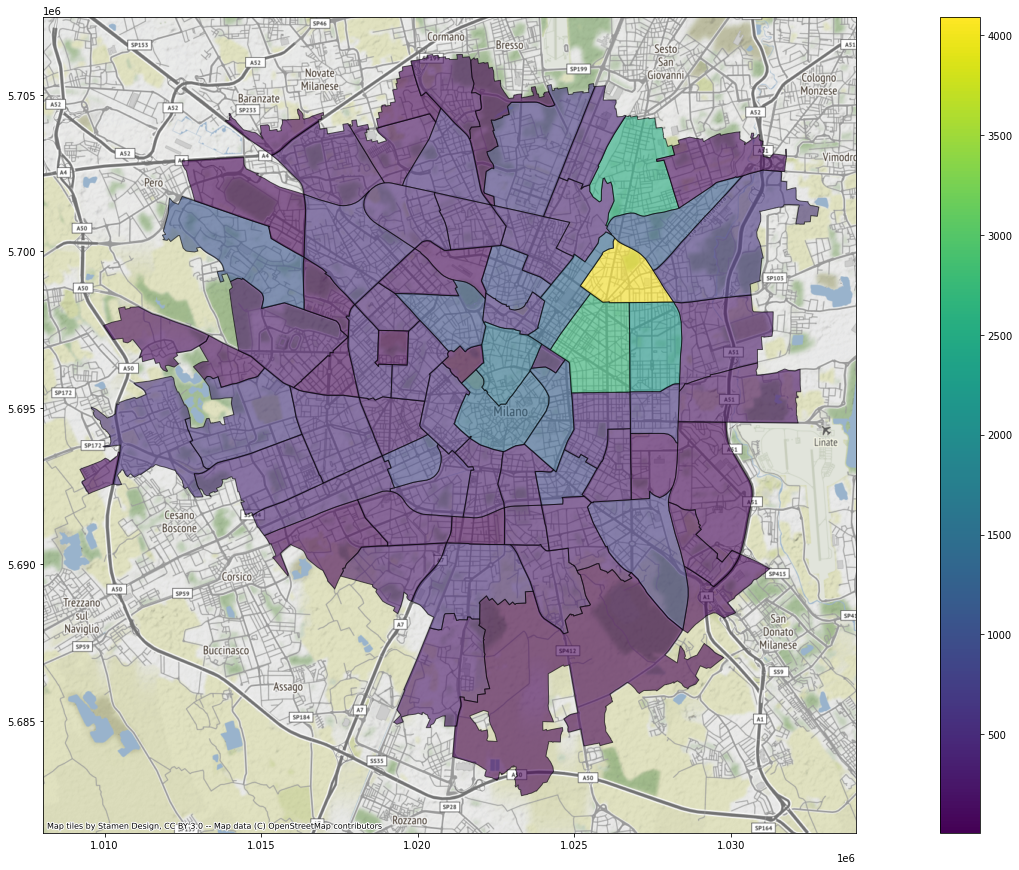

In [77]:
num_sosta = areesosta.count()
quartieri_count = pd.merge(max_sosta,quartieri, how = "right", on = "NIL")
ax = quartieri_count.to_crs(epsg=3857).plot(column = "stalli_tot", edgecolor='k', alpha = 0.6, figsize = (30,15), legend = True)
ctx.add_basemap(ax)


- data una via (inserita dall'utente), avere le aree di sosta di quella via

In [78]:
strada_sosta

id_amat id_via num_civico municipio  ... BARRATO  CAP  SEZIONE  MUNICIPIO
0            2   5339          0         5  ...          142     2066          5
1            2   5339          0         5  ...          142     2066          5
2            2   5339          0         5  ...          142     2066          5
3            2   5339          0         5  ...          142     2066          5
4            2   5339          0         5  ...          142     2066          5
...        ...    ...        ...       ...  ...     ...  ...      ...        ...
39919     3243   4290         36         5  ...       A  139      947          4
39920     3243   4290         36         5  ...       A  139      947          4
39921     3243   4290         36         5  ...          139      946          5
39922     3243   4290         36         5  ...          139      947          4
39923     3243   4290         36         5  ...          139      947          4

[39924 rows x 20 columns]

In [79]:
lst_codice = list(strada_sosta['CIVICO'])                                        #definiamo lst_codice e creamo una lista con quei valori
lst_nome = list(strada_sosta['DESCRIZIONE_VIA'])                                 #definiamo lst_nome e creamo una lista con quei valori
via_input = str(input("inserire id della via: "))                                #input della via
if via_input not in lst_nome:                                                    #primo if serve per controllare se l'input inserite rientra tra i valori della lista scelta
  print('via Inesistente')                                                       #messaggio
else:                                                                            #in caso rientri tra i valori eseguiamo un'altra azione, il numero civico
  num_via_input = int(input('inserire civico: '))                                #inseriamo numero civico
  if num_via_input not in lst_codice:                                            #secondo  if serve per controllare se l'input inserite rientra tra i valori della lista scelta
     print('civico Inesistente')                                                 #messaggio
  else:                                                                          #nel caso anche questo secondo valore rientri tra i valori della lista richiamata, allora eseguiamo la nostra opzione principale, dato che abbiamo tutti i dati che ci servono
    strada_sosta_nome= strada_sosta[strada_sosta.DESCRIZIONE_VIA == via_input]   #creamo strada_sosta_nome, che è uguale a strada_sosta con già i nomi delle vie filtrate, per poi farlo nella riga dopo ma con il civico.
    display(strada_sosta_nome[strada_sosta_nome.CIVICO == num_via_input])        #display e' una funzione di ipython, di solito se scrivi qualcosa la utilizza in automatico ma solo con l'ultimo valore che trova

inserire id della via: ABBIATEGRASSO
inserire civico: 7
civico Inesistente


- dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

inserire quartiere: PARCO NORD


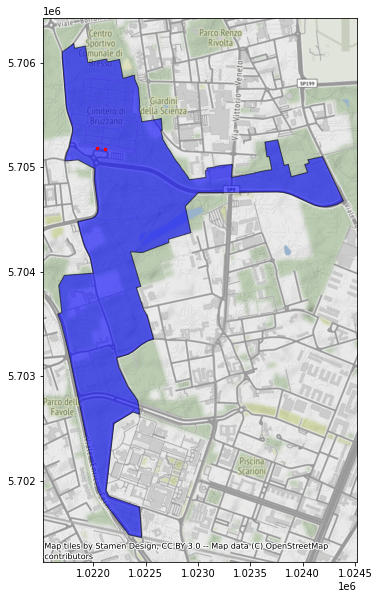

In [81]:
quartiere_input = str(input('inserire quartiere: '))
df_total_quart_input = df_total[df_total.NIL == quartiere_input]

quart_nome = quartieri[quartieri.NIL == quartiere_input]

ax = quart_nome.to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor ='blue',alpha = 0.6,figsize=(15,10))
df_total_quart_input.to_crs(epsg = 3857).plot(ax=ax,color='red',markersize = 5)
ctx.add_basemap(ax)

- date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;

In [82]:
from shapely.geometry import Point

In [83]:
df_total

id_amat id_via num_civico  ...   Shape_Leng    Shape_Area OBJECTID
0            2   5339          0  ...  8831.940397  3.232115e+06    148.0
1            2   5339          0  ...  8831.940397  3.232115e+06    148.0
2            2   5339          0  ...  8831.940397  3.232115e+06    148.0
3            2   5339          0  ...  8831.940397  3.232115e+06    148.0
4            2   5339          0  ...  8831.940397  3.232115e+06    148.0
...        ...    ...        ...  ...          ...           ...      ...
39919     3243   4290         36  ...  7108.599989  1.736689e+06    150.0
39920     3243   4290         36  ...  7108.599989  1.736689e+06    150.0
39921     3243   4290         36  ...  7108.599989  1.736689e+06    150.0
39922     3243   4290         36  ...  7108.599989  1.736689e+06    150.0
39923     3243   4290         36  ...  7108.599989  1.736689e+06    150.0

[39924 rows x 29 columns]

In [ ]:
coordinate_input = input('inserire coordinate: ')
coordinate = Point('coordinate_input')
df_coordinate = df_total[df_total.distance(coordinate)<=1000]
df_coordinate